# Influence of conformations on subpockets

We explore (visually) the influence of DFG/aC-helix conformations on the `kissim` subpocket centers.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from opencadd.databases.klifs import setup_remote
from opencadd.structure.pocket import PocketKlifs, PocketViewer
from kissim.definitions import SUBPOCKETS

from utils import random_pockets

In [3]:
# Number of structures to be displayed
N_STRUCTURES = 3
# Seed for random generator
SEED = None

## Aim of this notebook

Check if our `kissim` subpockets are reasonable across different kinase conformations.

## Data retrieval (KLIFS structures)

In [4]:
session = setup_remote()

In [5]:
structures = session.structures.all_structures()

Use random structures to calculate and visualize subpockets.

## Ung _et al._ conformations

BRAF structures in different conformations taken from [Ung _et al._ (2018)](https://www.sciencedirect.com/science/article/pii/S2451945618301491).

|             | aC-in        | aC-out       |
|-------------|--------------|--------------|
| __DFG-in__  | 2FB8 _CIDI_  | 4EHG _CODI_  |
| __DFG-out__ | 1UWH _CIDO_  | 4XV9 _CODO_  |

_Note_: KLIFS conformation annotation differs from Ung _et al._.

In [6]:
ung_pdb_ids = {"CIDI": "2FB8", "CODI": "4EHG", "CIDO": "1UWH", "CODO": "4XV9"}
print(ung_pdb_ids)
structure_klifs_ids = {
    i: session.structures.by_structure_pdb_id(j)
    .sample(random_state=SEED)
    .reset_index()["structure.klifs_id"][0]
    for i, j in ung_pdb_ids.items()
}
print(structure_klifs_ids)
ung_pockets = []
for i, j in structure_klifs_ids.items():
    pocket = PocketKlifs.from_structure_klifs_id(j, SUBPOCKETS, klifs_session=session)
    ung_pockets.append(pocket)

{'CIDI': '2FB8', 'CODI': '4EHG', 'CIDO': '1UWH', 'CODO': '4XV9'}
{'CIDI': 3086, 'CODI': 3064, 'CIDO': 3109, 'CODO': 6220}


In [7]:
viewer = PocketViewer()
for pocket in ung_pockets:
    viewer.add_pocket(pocket, sphere_opacity=1)
viewer.viewer
# NBVAL_SKIP

NGLWidget()

In [8]:
viewer.viewer.render_image(trim=True, factor=1, transparent=True)
# NBVAL_SKIP

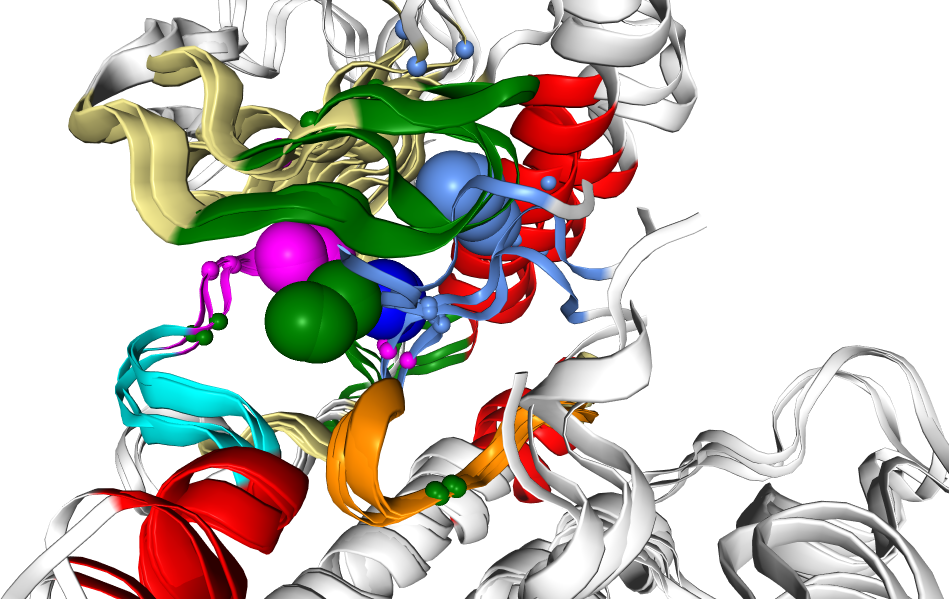

In [9]:
viewer.viewer._display_image()
# NBVAL_SKIP

<div class="alert alert-block alert-info">
Subpocket centers move w.r.t. to different conformations as expected.
</div>

## KLIFS conformations

### DFG conformations

> A 10-fold cross-validated decision tree model derived from systematic analysis of the Accessible Surface Area (ASA) (32) of kinase binding site residues and vectors defining the directionality of D<sup>xDFG.81</sup> and F<sup>xDFG.82</sup> side chains enable the automatic assessment of the DFG conformation of kinase structures with an accuracy > 99%. The decision tree algorithm identified the ASA values of D<sup>xDFG.81</sup> and y-values of D<sup>xDFG.81</sup> and F<sup>xDFG.82</sup> vectors (obtained by subtracting the coordinates of C$\gamma$ by C$\alpha$) as the most predictive descriptor combination for the discrimination of DFG conformations.

([_Nucleic Acids Res._ (2016), __44__, 6, D365–D371](https://doi.org/10.1093/nar/gkv1082))

In [10]:
pockets_by_dfg = {
    "in": random_pockets(
        structures[(structures["structure.dfg"] == "in")],
        N_STRUCTURES,
        SEED,
        SUBPOCKETS["anchor_residue.klifs_ids"],
        SUBPOCKETS["subpocket.name"],
        SUBPOCKETS["subpocket.color"],
        session,
    ),
    "out": random_pockets(
        structures[(structures["structure.dfg"] == "out")],
        N_STRUCTURES,
        SEED,
        SUBPOCKETS["anchor_residue.klifs_ids"],
        SUBPOCKETS["subpocket.name"],
        ["violet", "lightsteelblue", "darkseagreen"],
        session,
    ),
}

|    | name         | anchors      | color          |
|---:|:-------------|:-------------|:---------------|
|  0 | hinge_region | [16, 47, 80] | magenta        |
|  1 | dfg_region   | [19, 24, 81] | cornflowerblue |
|  2 | front_pocket | [10, 48, 72] | green          |

Structure KLIFS ID: 4693
Structure KLIFS ID: 9259
Structure KLIFS ID: 929


|    | name         | anchors      | color          |
|---:|:-------------|:-------------|:---------------|
|  0 | hinge_region | [16, 47, 80] | violet         |
|  1 | dfg_region   | [19, 24, 81] | lightsteelblue |
|  2 | front_pocket | [10, 48, 72] | darkseagreen   |

Structure KLIFS ID: 5037
Structure KLIFS ID: 5727
Structure KLIFS ID: 2305


In [11]:
viewer = PocketViewer()
for _, pockets in pockets_by_dfg.items():
    for pocket in pockets:
        viewer.add_pocket(pocket, sphere_opacity=1)
        component = list(viewer._components_structures.values())[-1]
        color = pocket.subpockets.set_index("subpocket.name")["subpocket.color"]["dfg_region"]
        pocket_residues = [i for i in pocket._residue_ids if i is not None]
        pocket_residues = " ".join([str(i) for i in pocket_residues])
        viewer.viewer.clear_representations(component=component)
        viewer.viewer.add_representation(
            repr_type="cartoon",
            selection=pocket_residues,
            component=component,
            color=color,
            opacity=0.5,
        )
viewer.viewer
# NBVAL_SKIP

NGLWidget()

In [12]:
viewer.viewer.render_image(trim=True, factor=1, transparent=True)
# NBVAL_SKIP

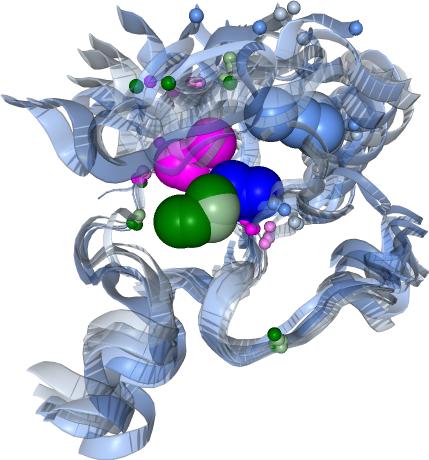

In [13]:
viewer.viewer._display_image()
# NBVAL_SKIP

<div class="alert alert-block alert-info">
Subpocket centers move w.r.t. to DFG-in (cyan) and DFG-out (grey blue) as expected.
</div>

### $\alpha$C-helix conformation

> Distance between the Ca atoms of residue D<sup>xDFG.81</sup> and conserved residue E<sup>αC.24</sup>.
>  * $\alpha$C-in: $[4, 7.2]$
>  * $\alpha$C-out: $>9.3$
>  * $\alpha$C-out-like: $[7.2, 9.3]$

([_J. Med. Chem._ (2014), __57__, 2, 249-277](https://pubs.acs.org/doi/abs/10.1021/jm400378w))

In [14]:
pockets_by_achelix = {
    "in": random_pockets(
        structures[
            (structures["structure.dfg"] == "in") & (structures["structure.ac_helix"] == "in")
        ],
        N_STRUCTURES,
        SEED,
        SUBPOCKETS["anchor_residue.klifs_ids"],
        SUBPOCKETS["subpocket.name"],
        SUBPOCKETS["subpocket.color"],
        session,
    ),
    "out": random_pockets(
        structures[
            (structures["structure.dfg"] == "in") & (structures["structure.ac_helix"] == "out")
        ],
        N_STRUCTURES,
        SEED,
        SUBPOCKETS["anchor_residue.klifs_ids"],
        SUBPOCKETS["subpocket.name"],
        ["violet", "lightsteelblue", "darkseagreen"],
        session,
    ),
}

|    | name         | anchors      | color          |
|---:|:-------------|:-------------|:---------------|
|  0 | hinge_region | [16, 47, 80] | magenta        |
|  1 | dfg_region   | [19, 24, 81] | cornflowerblue |
|  2 | front_pocket | [10, 48, 72] | green          |

Structure KLIFS ID: 772
Structure KLIFS ID: 2499
Structure KLIFS ID: 1460


|    | name         | anchors      | color          |
|---:|:-------------|:-------------|:---------------|
|  0 | hinge_region | [16, 47, 80] | violet         |
|  1 | dfg_region   | [19, 24, 81] | lightsteelblue |
|  2 | front_pocket | [10, 48, 72] | darkseagreen   |

Structure KLIFS ID: 6505
Structure KLIFS ID: 10629
Structure KLIFS ID: 6782


In [15]:
viewer = PocketViewer()
for _, pockets in pockets_by_achelix.items():
    for pocket in pockets:
        viewer.add_pocket(pocket, sphere_opacity=1)
        component = list(viewer._components_structures.values())[-1]
        color = pocket.subpockets.set_index("subpocket.name")["subpocket.color"]["dfg_region"]
        pocket_residues = [i for i in pocket._residue_ids if i is not None]
        pocket_residues = " ".join([str(i) for i in pocket_residues])
        viewer.viewer.clear_representations(component=component)
        viewer.viewer.add_representation(
            repr_type="cartoon",
            selection=pocket_residues,
            component=component,
            color=color,
            opacity=0.5,
        )
viewer.viewer
# NBVAL_SKIP

NGLWidget()

In [16]:
viewer.viewer.render_image(trim=True, factor=1, transparent=True)
# NBVAL_SKIP

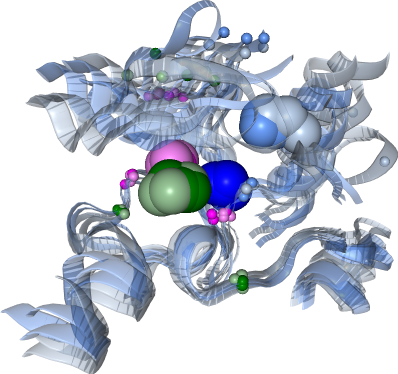

In [17]:
viewer.viewer._display_image()
# NBVAL_SKIP

<div class="alert alert-block alert-info">
Subpocket centers change only slightly w.r.t. to aC-in (cyan) and aC-out (grey blue) conformations.
</div>

## Discussion

The aim of this notebook was to check how the subpocket centers change w.r.t. to different conformations (DFG/$\alpha$C-helix) for random structures. 

We observed that the different DFG-conformations do have an influence on the subpocket center location - in the DFG-out conformation the "DFG-region" subpocket shifts a bit to the back as desired. The influence of the $\alpha$C-helix conformations are not as pronounced - as to be expected.

The other subpockets are only slightly affected by the conformations, which is to be expected and wanted.

So overall, we are content with the subpocket center locations depending on structure conformations.